In [17]:
# https://signate.jp/competitions/752#evaluation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)

In [2]:
# trainデータの先頭行を表示
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,...,80,1,8,3,3,1,0,0,0,0


In [18]:
# testデータの先頭行を表示
test.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,34,Travel_Frequently,358.039056,Research & Development,9.926847,3,Life Sciences,1,Female,...,3,80,1,11,2,3,7,7,2,7
1,2,37,Travel_Rarely,749.376719,Research & Development,10.391959,3,Medical,1,Male,...,4,80,0,5,3,2,1,3,1,0
2,4,34,Travel_Frequently,958.484177,Research & Development,3.297025,3,Life Sciences,2,Female,...,3,80,1,21,2,2,4,3,1,4
3,5,34,Travel_Rarely,79.174592,Research & Development,2.430032,4,Medical,3,Female,...,4,80,3,9,3,3,20,6,1,4
4,6,29,Travel_Rarely,943.191218,Research & Development,10.017149,2,Life Sciences,3,Male,...,3,80,1,25,2,4,1,7,0,0


In [22]:
# trainデータの統計的な情報を表示
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,2.655833,66.261667,2.716667,2.125833,2.717500,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,1.139502,20.257801,0.675847,1.185821,1.091797,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EnvironmentSatisfaction   1200 non-null   int64  
 9   Gender                    1200 non-null   object 
 10  HourlyRate                1200 non-null   int64  
 11  JobInvolvement            1200 non-null   int64  
 12  JobLevel                  1200 non-null   int64  
 13  JobRole                   1200 non-null   object 
 14  JobSatis

In [21]:
train['Attrition'].value_counts()

0    987
1    213
Name: Attrition, dtype: int64

In [6]:
train[["Over18","StandardHours"]]
print(train["StandardHours"].unique())

[80]


In [8]:
import pandas as pd
train = pd.read_csv("./train.csv")

# 一応NULL値ないか確認
# print(train.isnull().sum())
# カテゴリー内の値を確認
print(train["BusinessTravel"].unique())
print(train["Department"].unique())
print(train["Education"].unique())
print(train["EducationField"].unique())
print(train["EnvironmentSatisfaction"].unique())
print(train["Gender"].unique())
print(train["JobRole"].unique())
print(train["JobInvolvement"].unique())
print(train["JobSatisfaction"].unique())
print(train["MaritalStatus"].unique())
print(train["Over18"].unique())
print(train["OverTime"].unique())

['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
['Research & Development' 'Human Resources' 'Sales']
[3 1 4 5 2]
['Medical' 'Technical Degree' 'Life Sciences' 'Marketing' 'Other'
 'Human Resources']
[4 2 1 3]
['Male' 'Female']
['Laboratory Technician' 'Research Scientist' 'Human Resources'
 'Manufacturing Director' 'Sales Executive' 'Sales Representative'
 'Healthcare Representative' 'Research Director' 'Manager']
[2 3 1 4]
[2 1 3 4]
['Single' 'Divorced' 'Married']
['Y']
['No' 'Yes']


In [ ]:
# カテゴリーをLabelエンコーディング
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit_transform(train["BusinessTravel"].values)
train["BusinessTravel_Encoding"] = LE.fit_transform(train["BusinessTravel"].values)

LE.fit_transform(train["Department"].values)
train["Department_Encoding"] = LE.fit_transform(train["Department"].values)

LE.fit_transform(train["JobRole"].values)
train["JobRole_Encoding"] = LE.fit_transform(train["JobRole"].values)

# エンコーディングを実行後のデータ
print(train)


In [ ]:
# testデータの統計的な情報を表示
print(test.describe())

In [6]:
# testの方も変換
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit_transform(test["BusinessTravel"].values)
test["BusinessTravel_Encoding"] = LE.fit_transform(test["BusinessTravel"].values)

LE.fit_transform(test["Department"].values)
test["Department_Encoding"] = LE.fit_transform(test["Department"].values)

LE.fit_transform(test["JobRole"].values)
test["JobRole_Encoding"] = LE.fit_transform(test["JobRole"].values)

In [ ]:
# 目的変数(charges)の分布を可視化
plt.hist(train['Attrition'])
plt.ylabel('Attrition')
plt.xlabel('id')
plt.title('Distribution of Attrition')
plt.xlim(0, 1) 
plt.show()

print(train.groupby("Attrition").count())

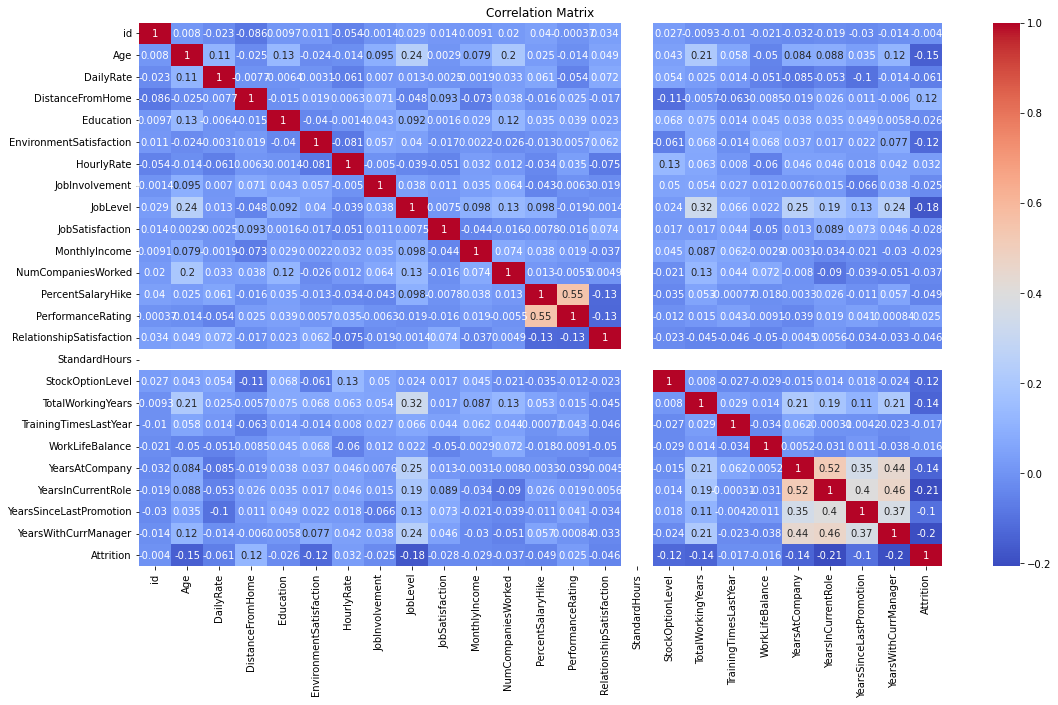

In [23]:
# 数値列の相関行列を計算
correlation_matrix = train.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1]:
correlation_with_price_range = train.corr()['Attrition'].drop('Attrition')
print(correlation_with_price_range)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
fig, ax = plt.subplots(figsize=(10, 10)) 
#横棒グラフ作成 
sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with Attrition") 
#表示 
plt.show()

NameError: name 'train' is not defined

In [ ]:
train_age_unique = train["Age"].unique()
print(np.sort(train_age_unique))

test_age_unique = test["Age"].unique()
print(np.sort(test_age_unique))

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(train["Age"])

In [ ]:
import pandas as pd

# 元データ
print(train["Age"])

# ビンの範囲とラベル
age_bins =   [16, 25, 30, 35, 40, 45, 50, 55, 60]
age_labels = [0,  1,  2,  3,  4,  5,  6,  7]

# trainデータのビン分割
train["Age_Binned"] = pd.cut(train["Age"], bins=age_bins, labels=age_labels)

# 結果を確認
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(train["Age_Binned"])

print(train["Age_Binned"].unique())

In [13]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score

# データ読み込み
train = pd.read_csv("./train.csv")

def label_encoding(data):
    '''
    カテゴリーをLabelエンコーディング
    '''
    LE = LabelEncoder()
    LE.fit_transform(data.values)
    return LE.fit_transform(data.values)

def age_binned(data):
    '''
    年齢をビン分割
    '''
    # ビンの範囲とラベル
    age_bins =   [16, 25, 30, 35, 40, 45, 50, 55, 60]
    age_labels = [0,  1,  2,  3,  4,  5,  6,  7]

    # trainデータのビン分割
    return pd.cut(data, bins=age_bins, labels=age_labels)

# trainを変換
train["BusinessTravel_E"] = label_encoding(train["BusinessTravel"])
train["Department_E"] = label_encoding(train["Department"])
train["JobRole_E"] = label_encoding(train["JobRole"])
train["Age_Binned"] = age_binned(train["Age"])

# 相互作用特徴量の追加
train["TotalWorkingYears_JobLevel"] = train["TotalWorkingYears"] * train["JobLevel"]

target_columns = [
    'Age_Binned', 'DistanceFromHome', 'EnvironmentSatisfaction',
    'JobLevel', 'StockOptionLevel', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'BusinessTravel_E', 'Department_E',
    'TotalWorkingYears_JobLevel'
]

train.drop(['StandardHours','BusinessTravel','Department','JobRole'], axis=1)
X = train[target_columns]
y = train['Attrition']

# ラベルエンコーディング
LE = LabelEncoder()
y = LE.fit_transform(y)

# ロジスティック回帰モデルのインスタンス化
model = LogisticRegression(max_iter=2000, C=1.0)

# ハイパーパラメータの範囲
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# グリッドサーチ
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

# ランダムサーチ
random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=10)
random_search.fit(X, y)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# ベイズ最適化
from skopt import BayesSearchCV
bayes_search = BayesSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=10)
bayes_search.fit(X, y)
best_params_bayes = bayes_search.best_params_
best_score_bayes = bayes_search.best_score_

# 交差検証を使用した評価
scorer = make_scorer(accuracy_score)
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

# 結果の出力
print("Grid Search:")
print("Best Parameters:", best_params_grid)
print("Best Score:", best_score_grid)

print("Random Search:")
print("Best Parameters:", best_params_random)
print("Best Score:", best_score_random)

print("Bayesian Optimization:")
print("Best Parameters:", best_params_bayes)
print("Best Score:", best_score_bayes)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())

c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Grid Search:
Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8400000000000001
Random Search:
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
Best Score: 0.8400000000000001
Bayesian Optimization:
Best Parameters: OrderedDict([('C', 1.0), ('penalty', 'l2'), ('solver', 'liblinear')])
Best Score: 0.8400000000000001
Cross-Validation Scores: [0.84583333 0.8375     0.84583333 0.83333333 0.83333333]
Mean Score: 0.8391666666666667


0    987
1    213
Name: Attrition, dtype: int64
0    691
1    149
Name: Attrition, dtype: int64
691


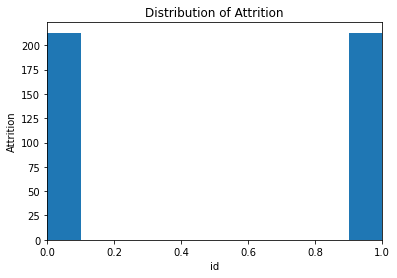

0    213
1    213
Name: Attrition, dtype: int64


In [14]:
# https://qiita.com/yuki_edy/items/eb5a0c36abea08ba0aeb
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# データ読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)

X = train
y = train['Attrition']
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71, stratify=y)
print(y_train.value_counts())

positive_count_train = y_train.value_counts()[0]
print(positive_count_train)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 目的変数(charges)の分布を可視化
plt.hist(X_resampled['Attrition'])
plt.ylabel('Attrition')
plt.xlabel('id')
plt.title('Distribution of Attrition')
plt.xlim(0, 1) 
plt.show()

print(X_resampled['Attrition'].value_counts())
# print(X_resampled.groupby("Attrition").count())

In [ ]:
import utils as Utils
import pandas as pd

# データ読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)
# print(train[["BusinessTravel","Department","JobRole","Age"]])

# trainを変換
train["BusinessTravel_E"] = Utils.label_encoding(train["BusinessTravel"])
train["Department_E"] = Utils.label_encoding(train["Department"])
train["JobRole_E"] = Utils.label_encoding(train["JobRole"])
train["Age_Binned"] = Utils.data_binned(train["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])
# 相互作用特徴量の追加
train["TotalWorkingYears_JobLevel"] = train["TotalWorkingYears"] * train["JobLevel"]
# print(train[["BusinessTravel","BusinessTravel_E","Department","Department_E","JobRole","JobRole_E","Age","Age_Binned"]])

train['count'] = train.groupby('BusinessTravel')['BusinessTravel'].transform('count')
print(train)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# データ読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# trainを変換
train["BusinessTravel_E"] = Utils.label_encoding(train["BusinessTravel"])
train["Department_E"] = Utils.label_encoding(train["Department"])
train["EducationField_E"] = Utils.label_encoding(train["EducationField"])
train["Gender_E"] = Utils.label_encoding(train["Gender"])
train["JobRole_E"] = Utils.label_encoding(train["JobRole"])
train["MaritalStatus_E"] = Utils.label_encoding(train["MaritalStatus"])
train["Over18_E"] = Utils.label_encoding(train["Over18"])
train["OverTime_E"] = Utils.label_encoding(train["OverTime"])

train["Age_Binned"] = Utils.data_binned(train["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])

train[['Age','Age_Binned','BusinessTravel','BusinessTravel_E',
       'Department','Department_E', 'EducationField', 'EducationField_E',
       'Gender', 'Gender_E', 'JobRole', 'JobRole_E',
       'MaritalStatus','MaritalStatus_E', 'Over18', 'Over18_E', 'OverTime', 'OverTime_E'
       ]]

In [27]:
# train = train.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)

# 特徴量と目的変数の分割
X = train[['id', 'Age','Age_Binned', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_E', 'Department_E', 'EducationField_E',
       'Gender_E', 'JobRole_E', 'MaritalStatus_E', 'Over18_E', 'OverTime_E',
       'Age_Binned']]
y = train['Attrition']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#
# モデル構築（重回帰）と精度検証（R2）
#
# インスタンス
model = LinearRegression()
# 学習（学習データ利用）
model.fit(X_train, y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model.score(X_train, y_train))
print('決定係数R2（テストデータ）:', 
      model.score(X_test, y_test))

#
# モデル構築（ランダムフォレスト）と精度検証（R2）
#
# インスタンス
model_rf = RandomForestRegressor()
# 学習（学習データ利用）
model_rf.fit(X_train, y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model_rf.score(X_train, y_train))
print('決定係数R2（テストデータ）:', 
      model_rf.score(X_test, y_test))

決定係数R2（学習データ）: 0.1981975016826626
決定係数R2（テストデータ）: 0.1644598893389646
決定係数R2（学習データ）: 0.8793817567567568
決定係数R2（テストデータ）: 0.2345863570391873


Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'BusinessTravel_E', 'Department_E', 'EducationField_E',
       'Gender_E', 'JobRole_E', 'MaritalStatus_E', 'Over18_E', 'OverTime_E',
       'Age_Binned'],
      dtype='object')


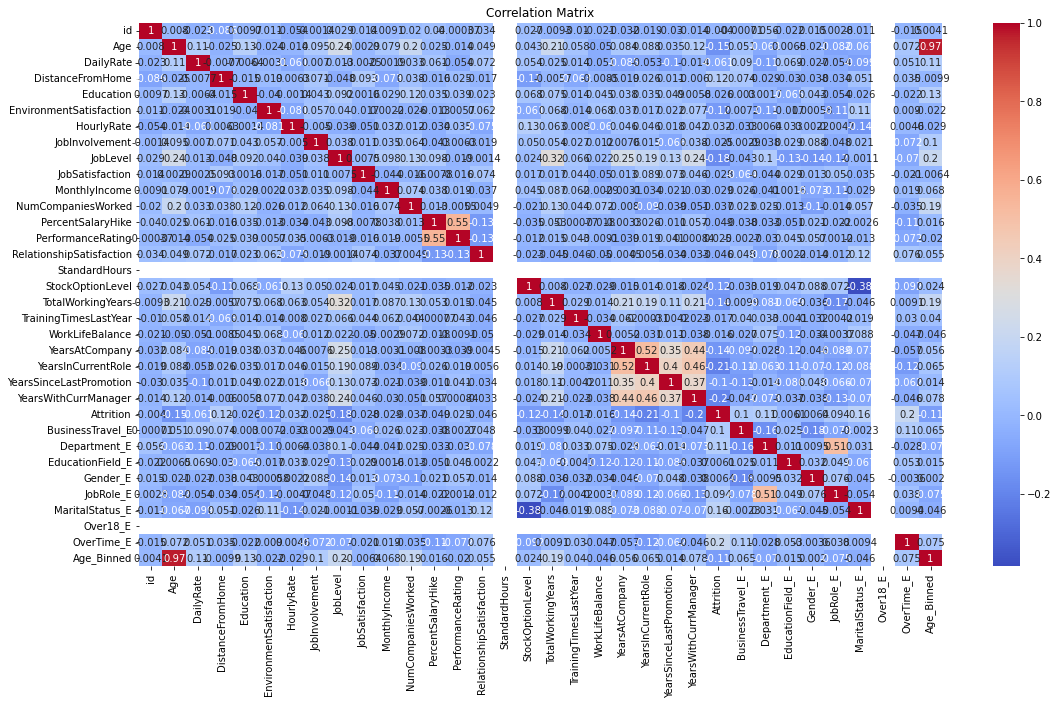

In [25]:
import pandas as pd
import utils as Utils

# データ読み込み
train = pd.read_csv("train.csv")

# trainを変換
train["BusinessTravel_E"] = Utils.label_encoding(train["BusinessTravel"])
train["Department_E"] = Utils.label_encoding(train["Department"])
train["EducationField_E"] = Utils.label_encoding(train["EducationField"])
train["Gender_E"] = Utils.label_encoding(train["Gender"])
train["JobRole_E"] = Utils.label_encoding(train["JobRole"])
train["MaritalStatus_E"] = Utils.label_encoding(train["MaritalStatus"])
train["Over18_E"] = Utils.label_encoding(train["Over18"])
train["OverTime_E"] = Utils.label_encoding(train["OverTime"])
train["Age_Binned"] = Utils.data_binned(train["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7]).astype(int)
print(train.columns)
# train = train.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)

# 数値列の相関行列を計算
correlation_matrix = train.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
correlation_with_price_range = train.corr()['Attrition'].drop('Attrition')
print(correlation_with_price_range)
# print(abs(correlation_with_price_range))
print()

# 絶対値が閾値以上の相関係数を持つ特徴量を抽出
selected_features = correlation_with_price_range[abs(correlation_with_price_range) >= 0.1]
print(selected_features)
print()
selected_features = correlation_with_price_range[abs(correlation_with_price_range) >= 0.15]
print(selected_features)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
# fig, ax = plt.subplots(figsize=(10, 10)) 
# #横棒グラフ作成 
# sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
# #X,Y軸とグラフタイトル 
# ax.set_xlabel("Correlation Coefficient") 
# ax.set_ylabel("Features") 
# ax.set_title(f"Correlation with Attrition") 
# #表示 
# plt.show()

id                         -0.003991
Age                        -0.153180
DailyRate                  -0.060977
DistanceFromHome            0.119646
Education                  -0.026255
EnvironmentSatisfaction    -0.121957
HourlyRate                  0.032017
JobInvolvement             -0.024697
JobLevel                   -0.178115
JobSatisfaction            -0.027633
MonthlyIncome              -0.029431
NumCompaniesWorked         -0.037084
PercentSalaryHike          -0.048952
PerformanceRating           0.024884
RelationshipSatisfaction   -0.045726
StandardHours                    NaN
StockOptionLevel           -0.124432
TotalWorkingYears          -0.136075
TrainingTimesLastYear      -0.017048
WorkLifeBalance            -0.015836
YearsAtCompany             -0.137592
YearsInCurrentRole         -0.206489
YearsSinceLastPromotion    -0.104601
YearsWithCurrManager       -0.200228
BusinessTravel_E            0.101148
Department_E                0.113929
EducationField_E            0.006105
G

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# データの読み込み
data = pd.read_csv('train.csv')  # データを適切な方法で読み込む

data["BusinessTravel_E"] = Utils.label_encoding(data["BusinessTravel"])
data["Department_E"] = Utils.label_encoding(data["Department"])
data["EducationField_E"] = Utils.label_encoding(data["EducationField"])
data["Gender_E"] = Utils.label_encoding(data["Gender"])
data["JobRole_E"] = Utils.label_encoding(data["JobRole"])
data["MaritalStatus_E"] = Utils.label_encoding(data["MaritalStatus"])
data["Over18_E"] = Utils.label_encoding(data["Over18"])
data["OverTime_E"] = Utils.label_encoding(data["OverTime"])

# 目的変数と特徴量を分割
X = data.drop('Attrition', axis=1)  # 特徴量
y = data['Attrition']  # 目的変数

# 相関関係の分析
correlation_matrix = data.corr(numeric_only=True)
correlation_with_attrition = correlation_matrix['Attrition'].drop('Attrition')
# print(correlation_with_attrition)
# print()

# 絶対値が0.15以上の相関係数を持つ特徴量を抽出
threshold = 0.15
selected_features = correlation_with_attrition[abs(correlation_with_attrition) >= threshold].index.tolist()
# print(selected_features)

# ランダムフォレストモデルを使用して特徴量の重要度を評価
model = RandomForestClassifier()
model.fit(X[selected_features], y)
feature_importances = model.feature_importances_

# 特徴量と重要度の表示
feature_importances_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)


In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv("./train.csv")
train_x = train.drop(['Attrition'], axis=1)
train_y = train['Attrition']
test_x = pd.read_csv("./test.csv")

import xgboost as xgb

# trainを変換
train_x["BusinessTravel_E"] = Utils.label_encoding(train_x["BusinessTravel"])
train_x["Department_E"] = Utils.label_encoding(train_x["Department"])
train_x["EducationField_E"] = Utils.label_encoding(train_x["EducationField"])
train_x["Gender_E"] = Utils.label_encoding(train_x["Gender"])
train_x["JobRole_E"] = Utils.label_encoding(train_x["JobRole"])
train_x["MaritalStatus_E"] = Utils.label_encoding(train_x["MaritalStatus"])
train_x["Over18_E"] = Utils.label_encoding(train_x["Over18"])
train_x["OverTime_E"] = Utils.label_encoding(train_x["OverTime"])
train_x["Age_Binned"] = Utils.data_binned(train_x["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])
train_x = train_x.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)

# testの方も変換
test_x["BusinessTravel_E"] = Utils.label_encoding(test_x["BusinessTravel"])
test_x["Department_E"] = Utils.label_encoding(test_x["Department"])
test_x["EducationField_E"] = Utils.label_encoding(test_x["EducationField"])
test_x["Gender_E"] = Utils.label_encoding(test_x["Gender"])
test_x["JobRole_E"] = Utils.label_encoding(test_x["JobRole"])
test_x["MaritalStatus_E"] = Utils.label_encoding(test_x["MaritalStatus"])
test_x["Over18_E"] = Utils.label_encoding(test_x["Over18"])
test_x["OverTime_E"] = Utils.label_encoding(test_x["OverTime"])
test_x["Age_Binned"] = Utils.data_binned(test_x["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])
test_x = test_x.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)

# コードの動作を確認するためのモデル
class Model:

    def __init__(self, params=None):
        self.model = None
        if params is None:
            self.params = {}
        else:
            self.params = params

    def fit(self, tr_x, tr_y):
        params = {'objective': 'binary:logistic', 'silent': 1, 'random_state': 71}
        params.update(self.params)
        num_round = 10

        # データを作成する際にカテゴリカル変数を含む列名をリストに格納する
        categorical_columns = ['BusinessTravel_E', 'Department_E', 'EducationField_E', 'Gender_E', 'JobRole_E', 'MaritalStatus_E', 'Over18_E', 'OverTime_E', 'Age_Binned']
        # カテゴリカル変数を含む列のdtypeを'Categorical'に変更する
        for col in categorical_columns:
            tr_x[col] = tr_x[col].astype('category')

        dtrain = xgb.DMatrix(tr_x, label=tr_y, enable_categorical=True, feature_names=train_x.columns)
        self.model = xgb.train(params, dtrain, num_round)

    def predict(self, x):
        # データを作成する際にカテゴリカル変数を含む列名をリストに格納する
        categorical_columns = ['BusinessTravel_E', 'Department_E', 'EducationField_E', 'Gender_E', 'JobRole_E', 'MaritalStatus_E', 'Over18_E', 'OverTime_E', 'Age_Binned']
        # カテゴリカル変数を含む列のdtypeを'Categorical'に変更する
        for col in categorical_columns:
            x[col] = x[col].astype('category')

        data = xgb.DMatrix(x, enable_categorical=True, feature_names=train_x.columns)
        pred = self.model.predict(data)
        return pred


# -----------------------------------
# モデルの学習と予測
# -----------------------------------
# モデルのハイパーパラメータを指定する
params = {'param1': 10, 'param2': 100}

# Modelクラスを定義しているものとする
# Modelクラスは、fitで学習し、predictで予測値の確率を出力する

# モデルを定義する
model = Model(params)

# 学習データに対してモデルを学習させる
model.fit(train_x, train_y)

# テストデータに対して予測結果を出力する
pred = model.predict(test_x)
print(pred)
# -----------------------------------
# バリデーション
# -----------------------------------
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# 学習データ・バリデーションデータを分けるためのインデックスを作成する
# 学習データを4つに分割し、うち1つをバリデーションデータとする
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]

# 学習データを学習データとバリデーションデータに分ける
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

# モデルを定義する
model = Model(params)

# 学習データに対してモデルを学習させる
# モデルによっては、バリデーションデータを同時に与えてスコアをモニタリングすることができる
model.fit(tr_x, tr_y)

# バリデーションデータに対して予測し、評価を行う
va_pred = model.predict(va_x)
score = log_loss(va_y, va_pred)
print(f'logloss: {score:.4f}')

# -----------------------------------
# クロスバリデーション
# -----------------------------------
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# 学習データを4つに分け、うち1つをバリデーションデータとする
# どれをバリデーションデータとするかを変えて学習・評価を4回行う
scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    model = Model(params)
    model.fit(tr_x, tr_y)
    va_pred = model.predict(va_x)
    score = log_loss(va_y, va_pred)
    scores.append(score)

# クロスバリデーションの平均のスコアを出力する
print(f'logloss: {np.mean(scores):.4f}')


In [2]:
import utils as Utils
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# データ読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv", header=None)

# trainを変換
train["BusinessTravel_E"] = Utils.label_encoding(train["BusinessTravel"])
train["Department_E"] = Utils.label_encoding(train["Department"])
train["EducationField_E"] = Utils.label_encoding(train["EducationField"])
train["Gender_E"] = Utils.label_encoding(train["Gender"])
train["JobRole_E"] = Utils.label_encoding(train["JobRole"])
train["MaritalStatus_E"] = Utils.label_encoding(train["MaritalStatus"])
train["Over18_E"] = Utils.label_encoding(train["Over18"])
train["OverTime_E"] = Utils.label_encoding(train["OverTime"])

train["Age_Binned"] = Utils.data_binned(train["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])

target_columns = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                  'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                  'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                  'BusinessTravel_E', 'Department_E', 'EducationField_E', 'JobRole_E', 'MaritalStatus_E', 'OverTime_E'
                  ]

# 特徴量と目的変数の分割
X = train[target_columns]
y = train['Attrition']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# データをXGBoostのデータ形式に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# モデルの学習のためのパラメータ設定
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42,
}

# グリッドサーチ
grid_params = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'lambda': [1, 2, 3],
    'alpha': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(**params),
                           param_grid=grid_params,
                           scoring='neg_log_loss',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Grid Search Best Params:", grid_search.best_params_)
print("Grid Search Best Score (Log Loss):", grid_search.best_score_)

# 最適なパラメータでモデルの学習
best_params = grid_search.best_params_
best_model = xgb.XGBClassifier(**params, **best_params)
best_model.fit(X_train, y_train)

# 評価用データの予測
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # クラス1の予測確率を取得
y_pred = (y_pred_proba > 0.5).astype(int)  # 0.5を閾値にして0または1に変換

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

# 結果の出力
print('Accuracy(test): %.5f' % accuracy)
print('macro-F1:', macro_f1)
print(classification_rep)

# ランダムサーチ
random_params = {
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'lambda': [0, 1, 2, 3, 4, 5],
    'alpha': [0, 0.1, 0.2, 0.3, 0.4]
}

random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(**params),
    param_distributions=random_params,
    scoring='neg_log_loss',
    cv=5,
    verbose=1,
    n_iter=50,  # ランダムサンプリング回数
    n_jobs=-1)

random_search.fit(X_train, y_train)

print("Random Search Best Params:", random_search.best_params_)
print("Random Search Best Score (Log Loss):", random_search.best_score_)

# 最適なパラメータでモデルの学習
best_params_random = random_search.best_params_
best_model_random = xgb.XGBClassifier(**params, **best_params_random)
best_model_random.fit(X_train, y_train)

# 評価用データの予測
y_pred_proba_random = best_model_random.predict_proba(X_test)[:, 1]  # クラス1の予測確率を取得
y_pred_random = (y_pred_proba_random > 0.5).astype(int)  # 0.5を閾値にして0または1に変換

# モデルの評価
accuracy_random = accuracy_score(y_test, y_pred_random)
macro_f1_random = f1_score(y_test, y_pred_random, average='macro')
classification_rep_random = classification_report(y_test, y_pred_random, digits=3)

# 結果の出力
print('Accuracy(test): %.5f' % accuracy_random)
print('macro-F1:', macro_f1_random)
print(classification_rep_random)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Grid Search Best Params: {'alpha': 0.2, 'colsample_bytree': 1.0, 'gamma': 0.1, 'lambda': 3, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}
Grid Search Best Score (Log Loss): -0.4041614884736161
Accuracy(test): 0.82500
macro-F1: 0.6487804878048781
              precision    recall  f1-score   support

           0      0.864     0.934     0.898       197
           1      0.519     0.326     0.400        43

    accuracy                          0.825       240
   macro avg      0.691     0.630     0.649       240
weighted avg      0.802     0.825     0.808       240

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Search Best Params: {'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 9, 'lambda': 3, 'gamma': 0, 'colsample_bytree': 0.7, 'alpha': 0.2}
Random Search Best Score (Log Loss): -0.3835279073240269
Accuracy(test): 0.85833
macro-F1: 0.7087378640776699
              precision    rec

In [12]:
import utils as Utils
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# データ読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv", header=None)

# trainを変換
train["BusinessTravel_E"] = Utils.label_encoding(train["BusinessTravel"])
train["Department_E"] = Utils.label_encoding(train["Department"])
train["EducationField_E"] = Utils.label_encoding(train["EducationField"])
train["Gender_E"] = Utils.label_encoding(train["Gender"])
train["JobRole_E"] = Utils.label_encoding(train["JobRole"])
train["MaritalStatus_E"] = Utils.label_encoding(train["MaritalStatus"])
train["Over18_E"] = Utils.label_encoding(train["Over18"])
train["OverTime_E"] = Utils.label_encoding(train["OverTime"])

train["Age_Binned"] = Utils.data_binned(train["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])

target_columns = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                  'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                  'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                  'BusinessTravel_E', 'Department_E', 'EducationField_E', 'JobRole_E', 'MaritalStatus_E', 'OverTime_E'
                  ]

# 特徴量と目的変数の分割
X = train[target_columns]
y = train['Attrition']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# モデルの学習のためのパラメータ設定
params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'subsample': 0.6,
    'min_child_weight': 10,
    'max_depth': 9,
    'lambda': 3,
    'gamma': 0,
    'colsample_bytree': 0.7,
    'alpha': 0.2
}

# XGBoostモデルの学習
num_round = 100
model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(X_train, y_train)

# ロジスティック回帰モデルの学習
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train, y_train)

# スタッキングでアンサンブル
estimators = [('xgb', model_xgb), ('lr', model_lr)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# スタッキングモデルの学習
stacking_model.fit(X_train, y_train)

# 評価用データの予測
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]  # クラス1の予測確率を取得
y_pred = (y_pred_proba > 0.5).astype(int)  # 0.5を閾値にして0または1に変換

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

# 結果の出力
print('Accuracy(test): %.5f' % accuracy)
print('macro-F1:', macro_f1)
print(classification_rep)

# 提出用データで予測
test["BusinessTravel_E"] = Utils.label_encoding(test["BusinessTravel"])
test["Department_E"] = Utils.label_encoding(test["Department"])
test["EducationField_E"] = Utils.label_encoding(test["EducationField"])
test["Gender_E"] = Utils.label_encoding(test["Gender"])
test["JobRole_E"] = Utils.label_encoding(test["JobRole"])
test["MaritalStatus_E"] = Utils.label_encoding(test["MaritalStatus"])
test["Over18_E"] = Utils.label_encoding(test["Over18"])
test["OverTime_E"] = Utils.label_encoding(test["OverTime"])

test["Age_Binned"] = Utils.data_binned(test["Age"], [16, 25, 30, 35, 40, 45, 50, 55, 60], [0, 1, 2, 3, 4, 5, 6, 7])

test = test.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)

# 提出用データで予測
test = test[target_columns]
# 評価用データの予測
y_pred_proba = stacking_model.predict_proba(test)[:, 1]  # クラス1の予測確率を取得
y_pred = (y_pred_proba > 0.5).astype(int)  # 0.5を閾値にして0または1に変換
print(len(y_pred))


Accuracy(test): 0.84375
macro-F1: 0.6118974978169234
              precision    recall  f1-score   support

           0      0.851     0.982     0.912       395
           1      0.708     0.200     0.312        85

    accuracy                          0.844       480
   macro avg      0.780     0.591     0.612       480
weighted avg      0.826     0.844     0.806       480

800
